Test the Augmentation library

In [1]:
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm
from matplotlib import pyplot as plt
#from sklearn.model_selection import train_test_split
#import keras
#from keras.applications.vgg16 import VGG16
#from keras.models import Model
#from keras.layers import Dense, Dropout, Flatten

# import third-party library
sys.path.append('./my_lib/')
from data_augmentation import DataAugmentation

In [2]:
# import data
csv_train = pd.read_csv('../input/labels.csv')
#csv_test = pd.read_csv('../input/sample_submission.csv')

In [3]:
# reduce input for test
csv_train = csv_train.head(100)

In [4]:
# Generate Labels
targets_series = pd.Series(csv_train['breed'])
# print(targets_series)
one_hot = pd.get_dummies(targets_series, sparse = True)
labels = np.asarray(one_hot)
n_check = random.randint(0, len(labels)-1)
print(csv_train['breed'][n_check], 'is encoded as', ''.join((str(i) for i in labels[n_check])))

boston_bull is encoded as 00000000000001000000000000000000000000000000000000000000000000


In [5]:
im_size = 90

x_train = []
y_train = []

In [6]:
for i, (f, breed) in enumerate(tqdm(csv_train.values)):
    img = cv2.imread('../input/train/{}.jpg'.format(f))
    x_train.append(cv2.resize(img, (im_size, im_size)))
    y_train.append(labels[i])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 84.99it/s]


Use external module to execute data augmentation.
The module execute:
- [ ] Inversion
- [ ] Sobel derivative
- [ ] Scharr derivative
- [ ] Laplacian
- [ ] Blur
- [ ] Gaussian blur [disable]
- [ ] Median blur
- [ ] Bilateral blur
- [x] Horizontal flips
- [x] Rotation

random check: 5


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

label original: 6


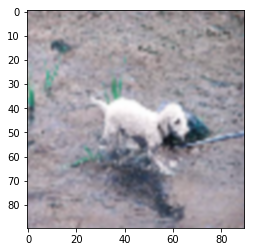

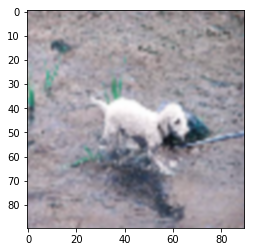

label: 6


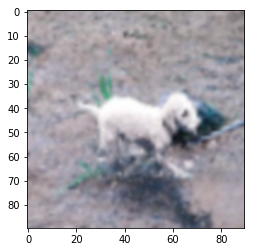

label: 6


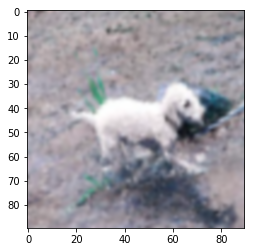

label: 6


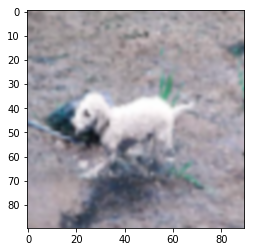

label: 6


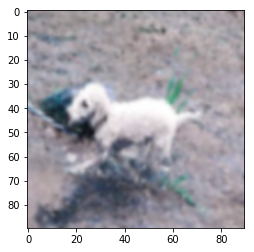

label: 6


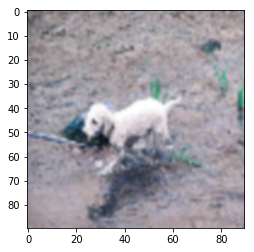

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 71.26it/s]


dataset became: 600


In [7]:
x_train_back = x_train[:]
data_aug = DataAugmentation(x_train, options={'horizontal_flips': True,
                                              'rotation': True,
                                            # 'rotation_config': [(10,1.2)]
                                              })
check_num = random.randint(0, len(data_aug))
print('random check:', check_num)
for i, images in enumerate(tqdm(data_aug)):
    if i == check_num:
        print('label original:', np.argmax(y_train[i]))
        plt.imshow(x_train_back[i], cmap = 'gray', interpolation = 'bicubic')
        plt.show()
        plt.imshow(x_train[i], cmap = 'gray', interpolation = 'bicubic')
        plt.show()
    for image in images:
        x_train.append(image)
        y_train.append(y_train[i])
        if i == check_num:
            print('label:', np.argmax(y_train[i]))
            plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
            plt.show()
    
print('dataset became:', len(x_train))

label: 00000000000000000000000000000000000000100000000000000000000000


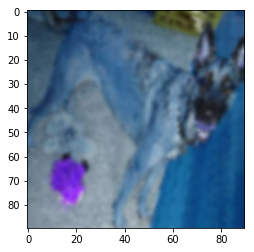

In [8]:
# check train
n_check = random.randint(0, len(y_train)-1)
print('label:', ''.join((str(i) for i in y_train[n_check])))
plt.imshow(x_train[n_check], cmap = 'gray', interpolation = 'bicubic')
plt.show()